In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os 
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow.keras.models import Sequential
import torch
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
import pandas as pd

In [25]:
img_dir = "/content/drive/MyDrive/So You Think You're Fit ?/vip/data"
img_height = 224 
img_width = 224
batch_size = 1026
input_shape = (img_height,img_width,3)

In [3]:
train = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir,
  labels=None,
  label_mode=None,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1026 files belonging to 1 classes.


In [4]:
df = pd.read_csv("/content/drive/MyDrive/So You Think You're Fit ?/vip/annotation.csv")

In [5]:
df.head()

,image,height,weight,BMI
0,f_001,1.55,61.0,25.390219
1,f_002,1.76,85.0,27.440599
2,f_003,1.78,56.0,17.674536
3,f_004,1.63,63.0,23.711845
4,f_005,1.76,54.0,17.432851


In [6]:
y = df[['height','weight','BMI']]

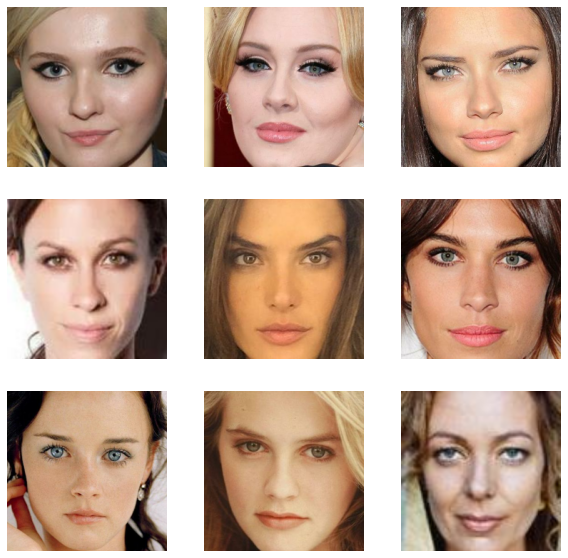

In [40]:
plt.figure(figsize=(10, 10))
for images in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(train_ds.class_names[labels[i][0].argmax()])
    plt.axis("off")

In [8]:
for im in train:
  X = im
  #break

In [9]:
X.shape

TensorShape([1026, 224, 224, 3])

In [19]:
 def train_test_splitt(X,y) :
   
   indices = tf.range(start=0, limit=X.shape[0], dtype=tf.int32)
   shuffled_indices = tf.random.shuffle(indices)

   shuffled_x = tf.gather(X, shuffled_indices)
   shuffled_y = tf.gather(y, shuffled_indices)

   return shuffled_x[:800],shuffled_x[800:],shuffled_y[:800],shuffled_y[800:]

In [20]:
X_train , X_test , y_train , y_test  = train_test_splitt(X,y)

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    #layers.CenterCrop(height = img_height, width = img_width),
    #layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [28]:
def get_cnn_model(input_shape, d = 0.2):
  model = Sequential()
  
  model.add(data_augmentation)
  model.add(layers.experimental.preprocessing.Rescaling(1./255))
  #conv
  model.add(Conv2D(16, kernel_size=3,  input_shape = input_shape)) #224
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  model.add(Dropout(d))
  
  #conv
  model.add(Conv2D(32, kernel_size=3)) #112
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  model.add(Dropout(d))

  
  model.add(Conv2D(64, kernel_size=3)) #56
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  model.add(Dropout(d))
  
  #conv
  model.add(Conv2D(128, kernel_size=3,strides = 2, padding = 'same')) #28
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  model.add(Dropout(d))
  
  #conv
  model.add(Conv2D(256, kernel_size=3, padding = 'same')) #14
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
  #model.add(Dropout(d))


  #model.add(Conv2D(512, kernel_size=2, strides = 1, activation='relu')) #2
  #model.add(BatchNormalization())
  #model.add(LeakyReLU(alpha=0.05))
  #model.add(Dropout(d))

  model.add(Flatten())
  #2 x FC
  model.add(Dense(256,activity_regularizer=keras.regularizers.L1(0.01)))
  #model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(0.2))
  model.add(Dense(128))
  #model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))

  #model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
  
  return model

In [37]:
model = get_cnn_model(input_shape) #, 0.4
#opt = keras.optimizers.adam(learning_rate=1e-3)#, decay = 0.95)
# model.compile(optimizer=opt,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"), optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, epochs=50, 
                    validation_data=(X_test, y_test), verbose = 1)

Epoch 1/50
13/13 [==============================] - 5s 254ms/step - loss: 2077.7583 - accuracy: 0.8975 - val_loss: 2046.1420 - val_accuracy: 1.0000
Epoch 2/50
13/13 [==============================] - 3s 233ms/step - loss: 2070.2603 - accuracy: 1.0000 - val_loss: 2045.2169 - val_accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 3s 231ms/step - loss: 2065.6201 - accuracy: 1.0000 - val_loss: 2043.4233 - val_accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 3s 232ms/step - loss: 2062.9697 - accuracy: 1.0000 - val_loss: 2043.1139 - val_accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 3s 230ms/step - loss: 2061.7759 - accuracy: 1.0000 - val_loss: 2042.7957 - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 3s 232ms/step - loss: 2061.2979 - accuracy: 1.0000 - val_loss: 2042.6421 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 3s 234ms/step - loss: 2061.1001 - accuracy: 1.0000 - val_los

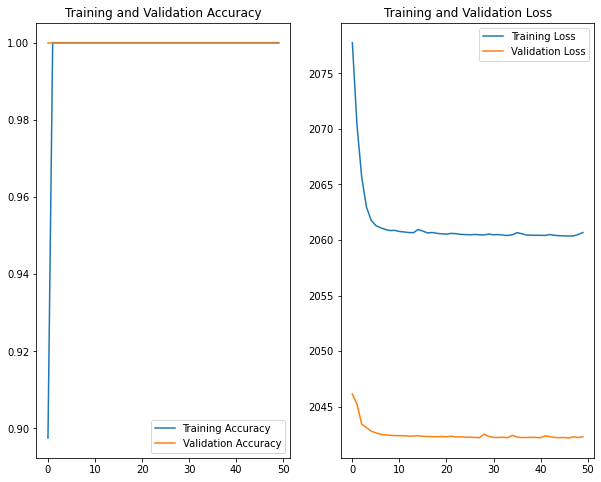

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization_20 (Batc (None, 222, 222, 16)      64        
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 222, 222, 16)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 111, 111, 16)     